In [129]:
import fcalc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.metrics import accuracy_score, accuracy_score, classification_report,recall_score, f1_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
le=LabelEncoder()

## Data preparation

In [102]:
df = pd.read_csv('data_sets/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


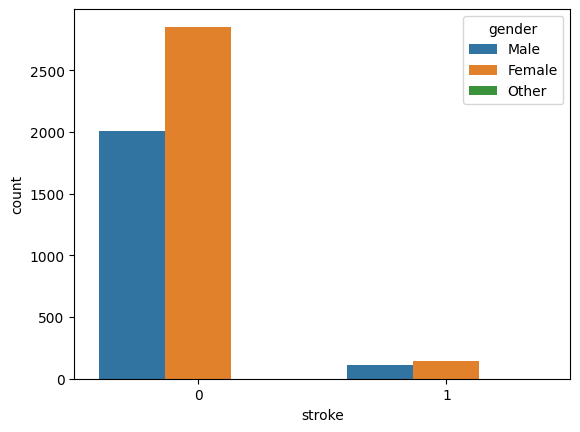

In [16]:
sns.countplot(x='stroke', hue='gender', data=df)
plt.show()

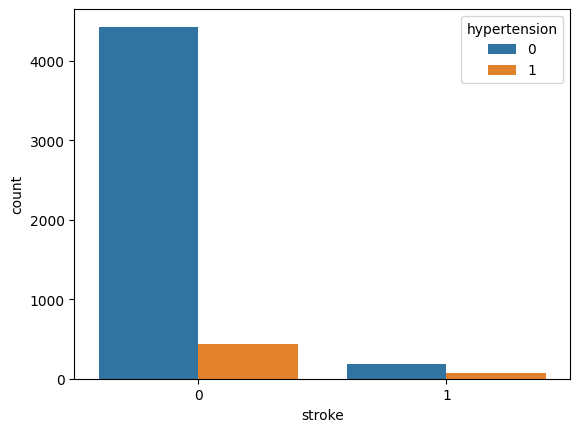

In [17]:
sns.countplot(x='stroke', hue='hypertension', data=df)
plt.show()

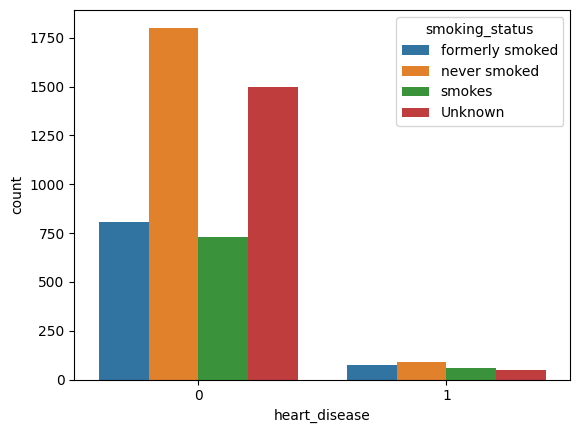

In [18]:
sns.countplot(x='heart_disease', hue='smoking_status', data=df)
plt.show()

In [103]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [104]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [105]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [106]:
df.drop(columns='id',inplace=True)
df=df[df['gender']!='Other']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


## Lazy-fca with binary attributes

In [107]:
df1 = df.copy()
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [108]:
new_data = dict()
new_data['age30'] = (df1['age']<=30).astype(int)
new_data['age30_60'] = ((df1['age']>30) & (df1['age']<=60)).astype(int)
new_data['age60'] = (df1['age']>60).astype(int)

In [109]:
new_data['avg_glucose_level55'] = (df1['avg_glucose_level']<=70).astype(int)
new_data['avg_glucose_level70_160'] = ((df1['avg_glucose_level']>70) & (df1['avg_glucose_level']<=160)).astype(int)
new_data['avg_glucose_level160_220'] = ((df1['avg_glucose_level']>160) & (df1['avg_glucose_level']<=220)).astype(int)
new_data['avg_glucose_level220'] = (df1['avg_glucose_level']>220).astype(int)

In [110]:
new_data['bmi30'] = (df1['bmi']<=30).astype(int)
new_data['bmi30_70'] = ((df1['bmi']>30) & (df1['bmi']<=70)).astype(int)
new_data['bmi70'] = (df1['bmi']>70).astype(int)

In [111]:
df_b = pd.DataFrame(new_data)

In [112]:
df1 = df1.drop(['age','avg_glucose_level','bmi'], axis=1)


In [113]:
df1

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
5,Male,0,0,Yes,Private,Urban,formerly smoked,1
...,...,...,...,...,...,...,...,...
5104,Female,0,0,No,children,Rural,Unknown,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


In [114]:
df_new=pd.concat([df_b, df1], sort=False, axis=1)

,age30,age30_60,age60,avg_glucose_level55,avg_glucose_level70_160,avg_glucose_level160_220,avg_glucose_level220,bmi30,bmi30_70,bmi70,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,0,0,1,0,0,0,1,0,1,0,Male,0,1,Yes,Private,Urban,formerly smoked,1
2,0,0,1,0,1,0,0,0,1,0,Male,0,1,Yes,Private,Rural,never smoked,1
3,0,1,0,0,0,1,0,0,1,0,Female,0,0,Yes,Private,Urban,smokes,1
4,0,0,1,0,0,1,0,1,0,0,Female,1,0,Yes,Self-employed,Rural,never smoked,1
5,0,0,1,0,0,1,0,1,0,0,Male,0,0,Yes,Private,Urban,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,0,0,0,1,0,0,1,0,0,Female,0,0,No,children,Rural,Unknown,0
5106,0,0,1,0,1,0,0,0,1,0,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,0,1,0,0,1,0,0,0,1,0,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,0,1,0,0,0,1,0,1,0,0,Male,0,0,Yes,Private,Rural,formerly smoked,0


In [115]:
y = df_new["stroke"]
y = y.astype(bool)

In [116]:
df_new = df_new.iloc[:,:-1]

In [118]:
x = pd.get_dummies(df_new, columns = df_new.columns)

In [119]:
x = x.astype(bool)

In [120]:
x

,age30_0,age30_1,age30_60_0,age30_60_1,age60_0,age60_1,avg_glucose_level55_0,avg_glucose_level55_1,avg_glucose_level70_160_0,avg_glucose_level70_160_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,True,False,True,False,False,True,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,True,False,True,False,False,True,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3,True,False,False,True,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
4,True,False,True,False,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
5,True,False,True,False,False,True,True,False,True,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,False,True,True,False,True,False,True,False,False,True,...,False,False,False,True,True,False,True,False,False,False
5106,True,False,True,False,False,True,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False
5107,True,False,False,True,True,False,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5108,True,False,False,True,True,False,True,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [121]:
X = x[:1000]
y = y[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
method = ["standard", "standard-support" , "ratio-support"]
alpha = [0.1, 0.5, 0.9]
for i in method:
    for j in alpha:
        bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train, 
                                                   method = i, alpha = j)
        bin_cls.predict(X_test.values)
        acc_scr = accuracy_score(y_test,bin_cls.predictions)
        print("Method:",i,"|","Alpha:",j,"|","Accuracy:",round(acc_scr,4))

Method: standard | Alpha: 0.1 | Accuracy: 0.7867
Method: standard | Alpha: 0.5 | Accuracy: 0.3467
Method: standard | Alpha: 0.9 | Accuracy: 0.0
Method: standard-support | Alpha: 0.1 | Accuracy: 0.7933
Method: standard-support | Alpha: 0.5 | Accuracy: 0.79
Method: standard-support | Alpha: 0.9 | Accuracy: 0.7867
Method: ratio-support | Alpha: 0.1 | Accuracy: 0.79
Method: ratio-support | Alpha: 0.5 | Accuracy: 0.8
Method: ratio-support | Alpha: 0.9 | Accuracy: 0.78


In [126]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method = "ratio-support", alpha = 0.5)

In [127]:
bin_cls.predict(X_test.values)

In [130]:
acc_score = round(accuracy_score(y_test,bin_cls.predictions),4)
recall_0 = round(recall_score(y_test, bin_cls.predictions,pos_label = 0),4)
recall_1 = round(recall_score(y_test, bin_cls.predictions,pos_label = 1),4)
f_score = round(f1_score(y_test, bin_cls.predictions),4)
BinBin = {"Model": "FCA_bin","Accuracy": acc_score,"Recall_0": recall_0,"Recall_1": recall_1,"F_score": f_score}
BinBin

{'Model': 'FCA_bin',
 'Accuracy': 0.8,
 'Recall_0': 0.8272,
 'Recall_1': 0.6842,
 'F_score': 0.5652}

## Lazy-fca with pattern structures

In [132]:
df.loc[:, 'avg_glucose_level'] = df['avg_glucose_level'].astype('int64')
df.loc[:, 'bmi'] = df['bmi'].astype('int64')

In [133]:
df.loc[:, "gender"] = le.fit_transform(df["gender"])
df.loc[:, "ever_married"] = le.fit_transform(df["ever_married"])
df.loc[:, "work_type"] = le.fit_transform(df["work_type"])
df.loc[:, "Residence_type"] = le.fit_transform(df["Residence_type"])
df.loc[:, "smoking_status"] = le.fit_transform(df["smoking_status"])
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.0,36.0,1,1
2,1,80.0,0,1,1,2,0,105.0,32.0,2,1
3,0,49.0,0,0,1,2,1,171.0,34.0,3,1
4,0,79.0,1,0,1,3,0,174.0,24.0,2,1
5,1,81.0,0,0,1,2,1,186.0,29.0,1,1


In [134]:
X = df.iloc[:1000,:-1]
y = df[:1000]['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [135]:
method = ["standard", "standard-support" , "ratio-support"]
alpha = [0.1, 0.5, 0.9]
for i in method:
    for j in alpha:
        pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train,categorical=np.array([0,1,2,3,5,6,7]), 
                                                   method = i, alpha = j)
        pat_cls.predict(X_test.values)
        acc_scr = accuracy_score(y_test,pat_cls.predictions)

        print("Method:",i,"|","Alpha:",j,"|","Accuracy:",round(acc_scr,4))

Method: standard | Alpha: 0.1 | Accuracy: 0.5967
Method: standard | Alpha: 0.5 | Accuracy: 0.2267
Method: standard | Alpha: 0.9 | Accuracy: 0.0167
Method: standard-support | Alpha: 0.1 | Accuracy: 0.68
Method: standard-support | Alpha: 0.5 | Accuracy: 0.6267
Method: standard-support | Alpha: 0.9 | Accuracy: 0.61
Method: ratio-support | Alpha: 0.1 | Accuracy: 0.67
Method: ratio-support | Alpha: 0.5 | Accuracy: 0.6867
Method: ratio-support | Alpha: 0.9 | Accuracy: 0.7133
Best score: 0.8


In [136]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train,categorical=np.array([0,1,2,3,5,6,7]), 
                                                   method = "ratio-support", alpha = 0.9)

In [137]:
pat_cls.predict(X_test.values)

In [138]:
from sklearn.metrics import accuracy_score, f1_score
acc_score = round(accuracy_score(y_test,pat_cls.predictions),4)
recall_0 = round(recall_score(y_test, pat_cls.predictions,pos_label = 0),4)
recall_1 = round(recall_score(y_test, pat_cls.predictions,pos_label = 1),4)
f_score = round(f1_score(y_test, pat_cls.predictions),4)
PatBin = {"Model": "Lazy_FCA","Accuracy": acc_score,"Recall_0": recall_0,"Recall_1": recall_1,"F_score": f_score}
PatBin

{'Model': 'Lazy_FCA',
 'Accuracy': 0.7133,
 'Recall_0': 0.7819,
 'Recall_1': 0.4211,
 'F_score': 0.3582}

In [139]:
from sklearn.metrics import accuracy_score, classification_report,recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Classification with standard ML tools

In [140]:
def try_models(model):
    model.fit(X_train, y_train)
    
    y_preds = model.predict(X_test)
    
    acc_score = round(accuracy_score(y_test, y_preds),4)
    recall_0 = round(recall_score(y_test, y_preds,pos_label = 0),4)
    recall_1 = round(recall_score(y_test, y_preds,pos_label = 1),4)
    f_score = round(f1_score(y_test, y_preds),4)
    result = {"Model": model,"Accuracy": acc_score,"Recall_0": recall_0,"Recall_1": recall_1,"F_score": f_score}
    return result

In [141]:
LogReg = try_models(LogisticRegression())
LogReg["Model"] = "LogisticRegression"
RanFor = try_models(RandomForestClassifier(random_state=666))
RanFor["Model"] = "RandomForest"
KNN = try_models(KNeighborsClassifier())
KNN["Model"] = "KNeighbors"
DecTree = try_models(DecisionTreeClassifier())
DecTree["Model"] = "DecisionTree"
data = [LogReg, RanFor, KNN,DecTree,BinBin,PatBin] 

C:\Users\artem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
final = pd.DataFrame(data)

final

,Model,Accuracy,Recall_0,Recall_1,F_score
0,LogisticRegression,0.8233,0.9383,0.3333,0.4176
1,RandomForest,0.8167,0.9383,0.2982,0.3820
2,KNeighbors,0.8100,0.9053,0.4035,0.4466
3,DecisionTree,0.7700,0.8395,0.4737,0.4390
4,FCA_bin,0.8000,0.8272,0.6842,0.5652
5,Lazy_FCA,0.7133,0.7819,0.4211,0.3582
